In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Introduction to the Problem
This data mining project focuses on solving a classification problem related to loan approval prediction. The goal is to develop a model that can classify whether a loan application will be approved or rejected, based on various features related to the applicant's personal and financial information. We will use a decision tree classifier to predict the loan status, considering factors such as income, education level, number of dependents, and asset values.

The dataset includes important variables like annual income, credit score, and the value of residential, commercial, and luxury assets. Understanding how these factors contribute to the loan approval process will be central to the analysis. For example, how does income level influence the likelihood of approval? Does a higher credit score correlate with a higher chance of loan approval? We will also examine whether the applicant's education or employment status has any bearing on the decision to approve or reject a loan application.

Additionally, we will explore the role of assets—both residential and commercial—in determining loan outcomes. How do asset values factor into the approval process, and is there a particular threshold above which loans are more likely to be approved? We are also interested in understanding whether the number of dependents impacts the loan approval decision, or if the term length and amount of the loan play a significant role.

By analyzing these features, we aim to uncover patterns and relationships that drive the decision-making process behind loan approval or rejection.

## Introduction to the Data
The dataset for this project is sourced from Kaggle, specifically from the Loan Approval Dataset (https://www.kaggle.com/datasets/saranjuji/loan-approval-datasetcsv). It contains information on loan applications, including details about the applicant and the status of the loan approval.

With 4269 rows and 13 columns, the dataset includes the following features:

- **loan_id**: A unique identifier for each loan application.
- **no_of_dependents**: The number of dependents the applicant has.
- **education**: The applicant's education level (e.g., Graduate, Not Graduate).
- **self_employed**: Whether the applicant is self-employed (Yes or No).
- **income_annum**: The applicant's annual income.
- **loan_amount**: The total loan amount applied for.
- **loan_term**: The term of the loan in years.
- **cibil_score**: The applicant's CIBIL score, which indicates creditworthiness.
- **residential_assets_value**: The value of the applicant's residential assets.
- **commercial_assets_value**: The value of the applicant's commercial assets.
- **luxury_assets_value**: The value of the applicant's luxury assets.
- **bank_asset_value**: The value of the applicant's bank assets.
- **loan_status**: The status of the loan application (Approved or Rejected).


By analyzing these features, we aim to uncover patterns that could explain why some loan applications are approved while others are rejected, and build a model that accurately predicts loan approval outcomes.

In [5]:
loanApproval = pd.read_csv('loan_approval_dataset.csv')
loanApproval.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Lets explore the Data

In this part of the data exploration, we first checked the shape of the dataset using the `loanApproval.shape` command, which showed that the dataset contains 4269 rows and 13 columns. This gives us a clear sense of the size of the dataset—4269 loan applications, each with 13 different attributes.

We also checked for any missing values in the dataset. The output revealed that there are no missing values in any of the columns, which is great because it means we don’t need to worry about handling null data at this point.

Next, we verified that there are no duplicate rows in the dataset, and the result confirmed that there are no duplicates, ensuring that each loan application is unique.

We then looked at the data types of each column using the `dtype` function. Most of the columns are numerical (integer type), but some columns, like `education`, `self_employed`, and `loan_status`, are of object type, meaning they contain categorical data.

Finally, we checked the column names for any extra spaces. The output showed that a few column names had leading spaces (like ' no_of_dependents' and ' education'). This means the column names need a bit of cleaning to remove these extra spaces before further analysis.

In [6]:
loanApproval.shape

(4269, 13)

### Are there any missing values?

In [7]:
loanApproval.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
# check for duplicates
print("Duplicates found: ", loanApproval.duplicated().sum(), "rows")

Duplicates found:  0 rows


In [9]:
loanApproval.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

### White space in variable names

In [10]:
loanApproval.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

## Preprocessing and cleaning

In [11]:
# First lets remove all white spaces in the columns
loanApproval.columns = loanApproval.columns.str.strip()
loanApproval.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Here we do not need loan_id, we may drop more later after analysis

In [12]:
loanApproval = loanApproval.drop('loan_id', axis=1)
loanApproval.head(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


We have 3 columns that have strings. 
lets look at the education column.
we want to make this column easier to use

In [13]:
# view unique values of education column
print(loanApproval['education'].unique())
print(loanApproval['loan_status'].unique())
print(loanApproval['self_employed'].unique())

[' Graduate' ' Not Graduate']
[' Approved' ' Rejected']
[' No' ' Yes']


In [14]:
# Lets map the columns to 1 and 0
loanApproval['education'] = loanApproval['education'].map({' Graduate': 1, ' Not Graduate': 0})
loanApproval['self_employed'] = loanApproval['self_employed'].map({' Yes': 1, ' No': 0})
loanApproval['loan_status'] = loanApproval['loan_status'].map({' Approved': 1, ' Rejected': 0})
loanApproval.head(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0


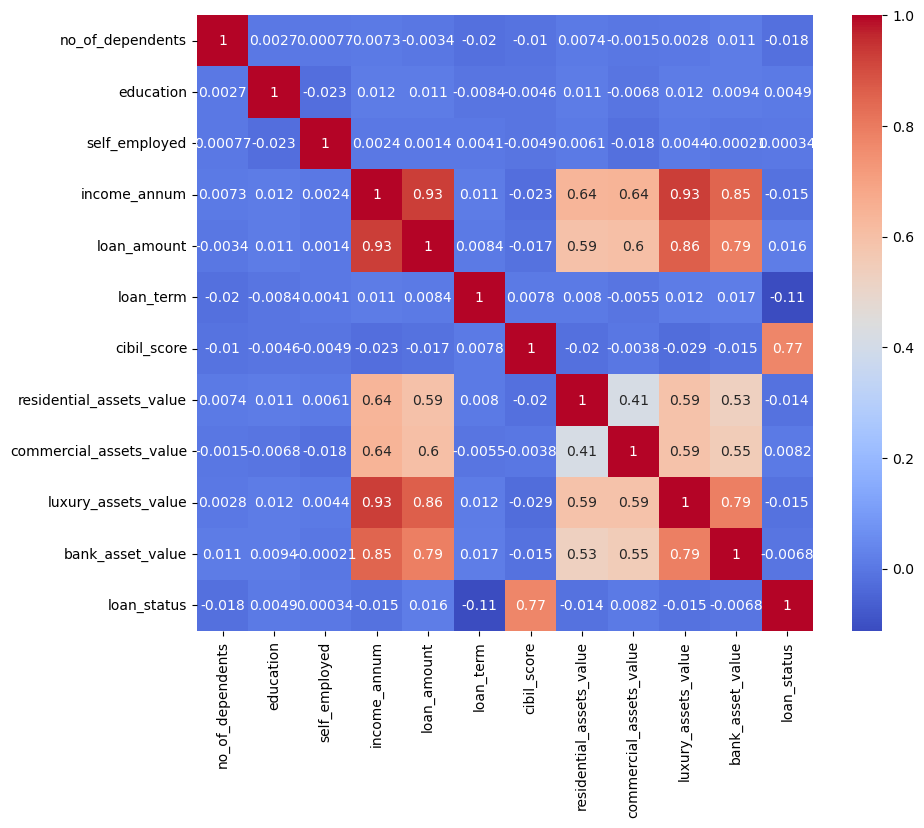

In [15]:
# create a visual of the correlation heatmap 
corr_matrix = loanApproval.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

/tmp/ipykernel_30228/258668635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='cibil_score', data=loanApproval, palette='Set1')


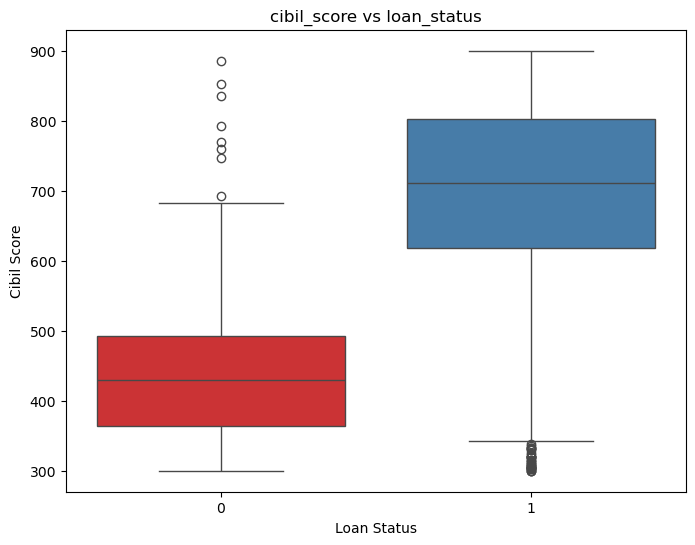

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=loanApproval, palette='Set1')
plt.title('cibil_score vs loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Cibil Score')
plt.show()

In [17]:
low_cibil_threshold = 375
# Segmenting data: Approved loans with low CIBIL vs others
low_cibil_approved = loanApproval[(loanApproval['cibil_score'] < low_cibil_threshold) & (loanApproval['loan_status'] == 1)]
other_approved = loanApproval[(loanApproval['cibil_score'] >= low_cibil_threshold) & (loanApproval['loan_status'] == 1)]

# Compare summary statistics
print("Low CIBIL Approved Loans Summary:")
print(low_cibil_approved.describe())
print("Other Approved Loans Summary:")
print(other_approved.describe())


Low CIBIL Approved Loans Summary:
       no_of_dependents  education  self_employed  income_annum   loan_amount  \
count         58.000000  58.000000      58.000000  5.800000e+01  5.800000e+01   
mean           2.448276   0.517241       0.517241  4.508621e+06  1.536379e+07   
std            1.738848   0.504067       0.504067  2.955001e+06  9.860478e+06   
min            0.000000   0.000000       0.000000  3.000000e+05  1.100000e+06   
25%            1.000000   0.000000       0.000000  1.700000e+06  5.925000e+06   
50%            2.500000   1.000000       1.000000  4.400000e+06  1.520000e+07   
75%            4.000000   1.000000       1.000000  6.850000e+06  2.327500e+07   
max            5.000000   1.000000       1.000000  9.800000e+06  3.270000e+07   

       loan_term  cibil_score  residential_assets_value  \
count  58.000000    58.000000              5.800000e+01   
mean    3.137931   331.431034              7.824138e+06   
std     0.999092    22.545947              6.609810e+06   


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create VIF matrix
vif_matrix = pd.DataFrame()
vif_matrix["feature"] = loanApproval.columns
vif_matrix["VIF"] = [variance_inflation_factor(loanApproval.values, i) for i in range(loanApproval.shape[1])]
vif_matrix.sort_values(by="VIF", ascending=False)

,feature,VIF
3,income_annum,75.352867
9,luxury_assets_value,27.549798
4,loan_amount,27.548532
6,cibil_score,17.185551
10,bank_asset_value,12.160415
11,loan_status,5.977313
5,loan_term,4.432473
7,residential_assets_value,3.910599
8,commercial_assets_value,3.883730
0,no_of_dependents,2.924153


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare the features (X) and target (y)
X = loanApproval[['income_annum', 'loan_amount', 'residential_assets_value', 'loan_term']]
y = loanApproval['loan_status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier with max_depth
model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limit the depth to 5
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to visualize feature importance
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)



              precision    recall  f1-score   support

           0       0.42      0.25      0.31       471
           1       0.65      0.80      0.72       810

    accuracy                           0.60      1281
   macro avg       0.53      0.52      0.51      1281
weighted avg       0.56      0.60      0.57      1281

Feature Importance:
                    Feature  Importance
3                 loan_term    0.405990
0              income_annum    0.264065
1               loan_amount    0.197726
2  residential_assets_value    0.132218


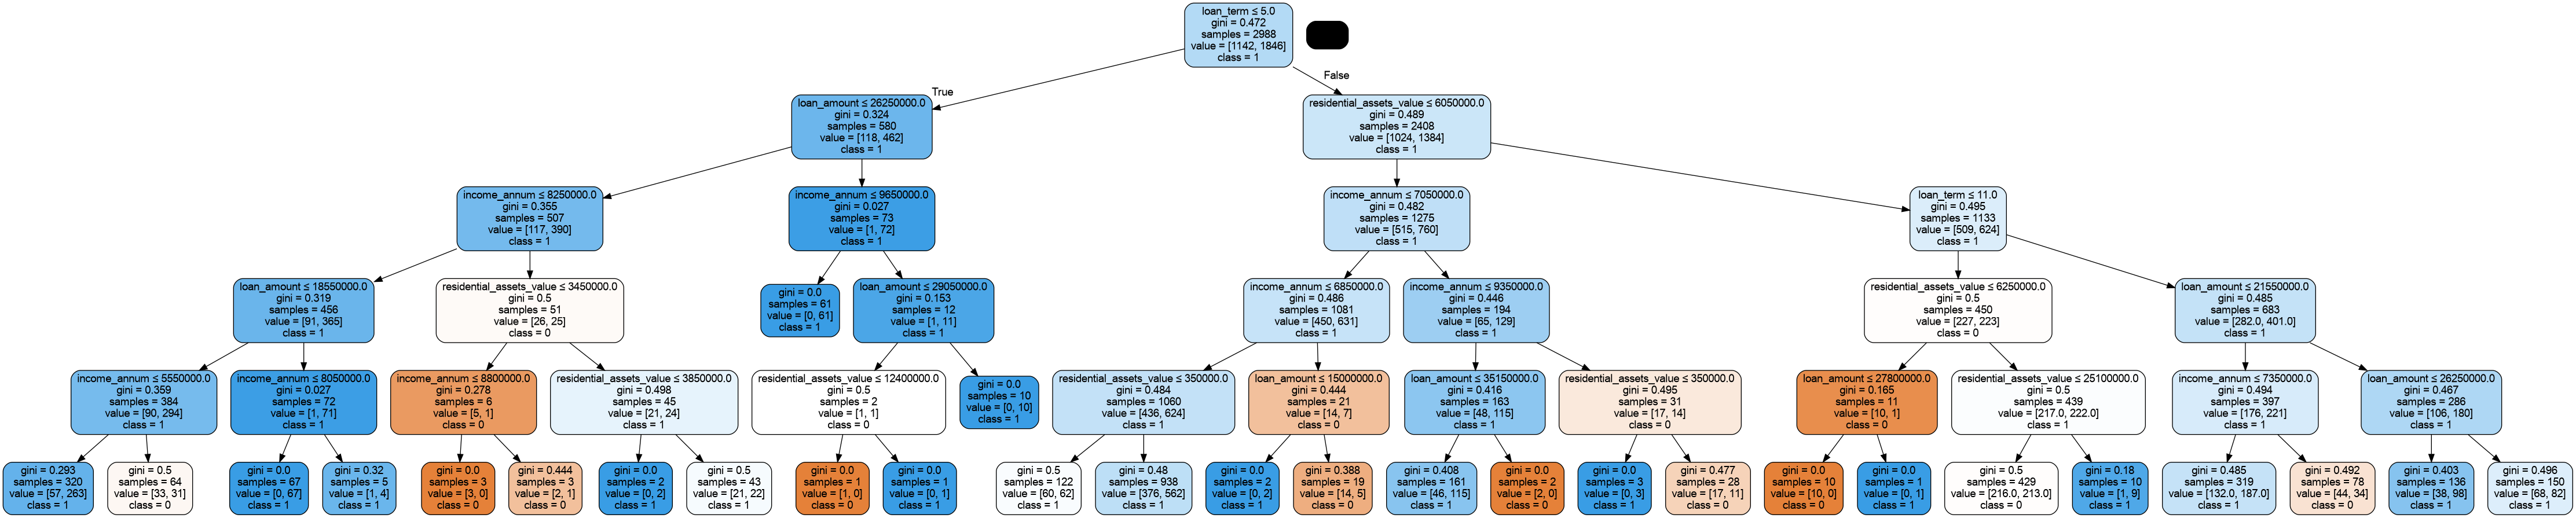

In [24]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Export the decision tree as a .dot file
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=[str(cls) for cls in model.classes_],  # Convert class names to strings
                           filled=True, rounded=True,  
                           special_characters=True)  

# Create a Graphviz source from the .dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the tree to a PNG file
graph.write_png("decision_tree.png")

# Display the image from the saved file
Image("decision_tree.png")
